In [5]:
import sys, os, gzip, json
sys.path = [os.path.dirname(os.getcwd())] + sys.path
print(sys.path)

import rdkit
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
print(rdkit.rdBase.rdkitVersion)
from rdkit.Chem import AllChem

import rdchiral
print(rdchiral.__path__)
from rdchiral.main import rdchiralRun, rdchiralRunText, rdchiralReaction, rdchiralReactants

from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 

['/Users/ccoley/rdchiral', '/Users/ccoley/rdchiral', '/Users/ccoley/rdchiral', '', '/Users/ccoley/ASKCOS/Make-It', '/Users/ccoley/ASKCOS/ASKCOS_Website', '/Users/ccoley/deepchem', '/Users/ccoley/rdchiral/templates/\n\nPATH=/opt/local/bin', '/opt/local/sbin', '/Users/ccoley/miniconda3/bin', '/Users/ccoley/miniconda2/bin', '/Usrs/ccoley/deepchem', '/usr/local/bin', '/usr/bin', '/bin', '/usr/sbin', '/sbin', '/Library/TeX/texbin', '/opt/X11/bin', '/usr/local/sbin\n', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python36.zip', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/lib-dynload', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/site-packages', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/site-packages/IPython/extensions', '/Users/ccoley/.ipython']
2018.09.1
['/Users/ccoley/rdchiral/rdchiral']


In [24]:
def sep_bar():
    print('')
    for i in range(3):
        print('='*80)
    print('')

In [16]:
with gzip.open('data/uspto.templates.json.gz') as f:
    templates = json.load(f)
with gzip.open('data/uspto.reactions.json.gz') as f:
    reactions = json.load(f)

In [17]:
templates[:3]

[{'dimer_only': False,
  'intra_only': False,
  'necessary_reagent': '',
  'products': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4]',
  'reactants': 'Cl-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]',
  'reaction_id': 0,
  'reaction_smarts': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]'},
 {'dimer_only': False,
  'intra_only': False,
  'necessary_reagent': '',
  'products': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4]',
  'reactants': 'Cl-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]',
  'reaction_id': 1,
  'reaction_smarts': '[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]'},
 {'dimer_only': False,
  'intra_only': False,
  'necessary_reagent': '',
  'products': '[C:2]-[S;H0;D4;+

In [18]:
reactions[:3]

[{'_id': 0,
  'products': '[CH2:5]([S:7]([O:4][CH2:3][CH2:2][Br:1])(=[O:9])=[O:8])[CH3:6]',
  'reactants': '[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=[O:9])=[O:8])[CH3:6].CCOCC',
  'source': 'uspto',
  'source_id': 'd55b478b903cc66713bcd03da0cb590206c063770b25661297a153ea49f28716',
  'spectators': 'C(N(CC)CC)C'},
 {'_id': 1,
  'products': '[CH3:6][S:7]([O:5][CH2:4][CH2:3][CH2:2][Br:1])(=[O:9])=[O:8]',
  'reactants': '[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7](Cl)(=[O:9])=[O:8].CCOCC',
  'source': 'uspto',
  'source_id': '4f4596769c26752550f51dfa2e2ed3c85314e993098a218c9c8708d24994ef30',
  'spectators': 'C(N(CC)CC)C'},
 {'_id': 2,
  'products': '[CH2:10]([S:14]([O:3][CH2:2][CH2:1][Cl:4])(=[O:16])=[O:15])[CH:11]([CH3:13])[CH3:12]',
  'reactants': '[CH2:1]([Cl:4])[CH2:2][OH:3].CCOCC.[CH2:10]([S:14](Cl)(=[O:16])=[O:15])[CH:11]([CH3:13])[CH3:12]',
  'source': 'uspto',
  'source_id': 'b437d8086077a93b6c04154fe4ea6b3b8a718cf617fcfd989f1ff51b9ce8087c',
  'spectators': 'C(N(CC)CC)C'}]

In [40]:
reaction_id_to_index = {x['_id']: i for i, x in enumerate(reactions)}

In [47]:
def show_k(k):
    if 'reaction_smarts' not in templates[k]:
        return
    print(k)
    reaction = reactions[reaction_id_to_index[templates[k]['reaction_id']]]
    display(Chem.MolFromSmiles(reaction['reactants'])) 
    print('Reactants: {}'.format(reaction['reactants']))
    display(Chem.MolFromSmiles(reaction['products']))
    print('Products: {}'.format(reaction['products']))
    display(AllChem.ReactionFromSmarts(templates[k]['reaction_smarts']))
    print('Extracted template: {}'.format(templates[k]['reaction_smarts']))
    sep_bar()

#### Good examples

25


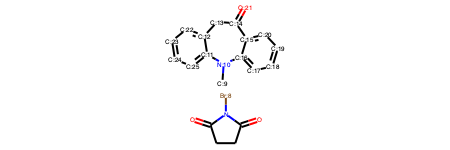

Reactants: C1C(=O)N([Br:8])C(=O)C1.[CH3:9][N:10]1[C:16]2[CH:17]=[CH:18][CH:19]=[CH:20][C:15]=2[C:14](=[O:21])[CH2:13][C:12]2[CH:22]=[CH:23][CH:24]=[CH:25][C:11]1=2


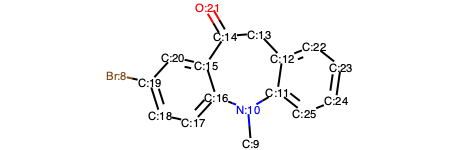

Products: [Br:8][C:19]1[CH:18]=[CH:17][C:16]2[N:10]([CH3:9])[C:11]3[CH:25]=[CH:24][CH:23]=[CH:22][C:12]=3[CH2:13][C:14](=[O:21])[C:15]=2[CH:20]=1


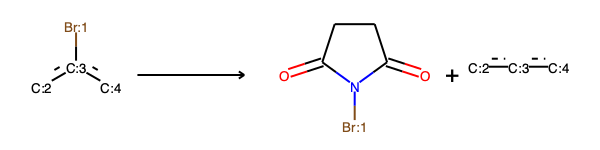

Extracted template: [Br;H0;D1;+0:1]-[c;H0;D3;+0:3](:[c:2]):[c:4]>>O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[c:2]:[cH;D2;+0:3]:[c:4]


35


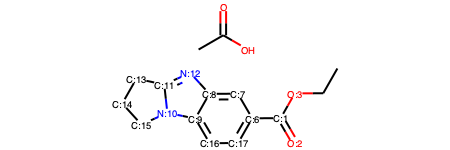

Reactants: [C:1]([C:6]1[CH:17]=[CH:16][C:9]2[N:10]3[CH2:15][CH2:14][CH2:13][C:11]3=[N:12][C:8]=2[CH:7]=1)([O:3]CC)=[O:2].C(O)(=O)C


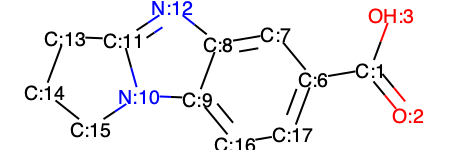

Products: [C:1]([C:6]1[CH:17]=[CH:16][C:9]2[N:10]3[CH2:15][CH2:14][CH2:13][C:11]3=[N:12][C:8]=2[CH:7]=1)([OH:3])=[O:2]


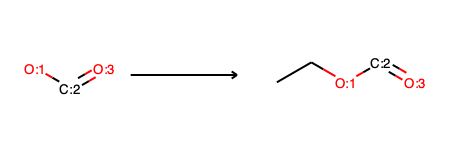

Extracted template: [O;D1;H0:3]=[C:2]-[OH;D1;+0:1]>>C-C-[O;H0;D2;+0:1]-[C:2]=[O;D1;H0:3]


49


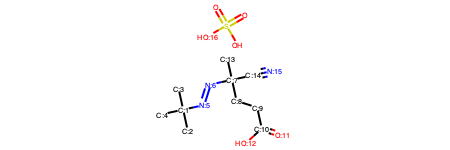

Reactants: [C:1]([N:5]=[N:6][C:7]([C:14]#[N:15])([CH3:13])[CH2:8][CH2:9][C:10]([OH:12])=[O:11])([CH3:4])([CH3:3])[CH3:2].[OH:16]S(O)(=O)=O


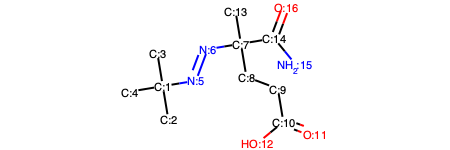

Products: [C:1]([N:5]=[N:6][C:7]([C:14](=[O:16])[NH2:15])([CH3:13])[CH2:8][CH2:9][C:10]([OH:12])=[O:11])([CH3:4])([CH3:2])[CH3:3]


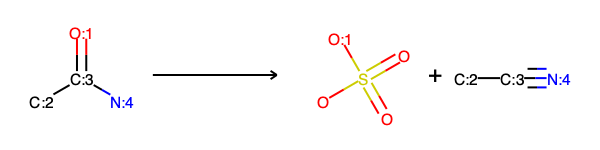

Extracted template: [C:2]-[C;H0;D3;+0:3](-[NH2;D1;+0:4])=[O;H0;D1;+0:1]>>O-S(=O)(=O)-[OH;D1;+0:1].[C:2]-[C;H0;D2;+0:3]#[N;H0;D1;+0:4]


51


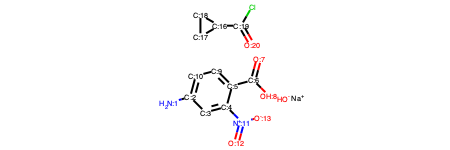

Reactants: [NH2:1][C:2]1[CH:10]=[CH:9][C:5]([C:6]([OH:8])=[O:7])=[C:4]([N+:11]([O-:13])=[O:12])[CH:3]=1.[OH-].[Na+].[CH:16]1([C:19](Cl)=[O:20])[CH2:18][CH2:17]1


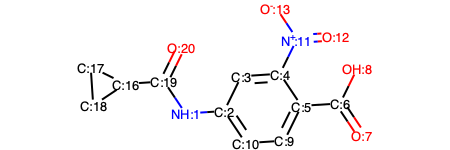

Products: [CH:16]1([C:19]([NH:1][C:2]2[CH:10]=[CH:9][C:5]([C:6]([OH:8])=[O:7])=[C:4]([N+:11]([O-:13])=[O:12])[CH:3]=2)=[O:20])[CH2:18][CH2:17]1


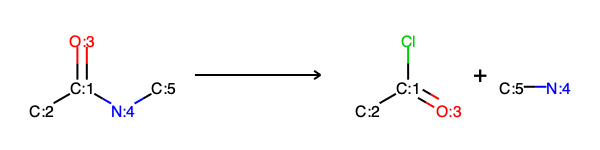

Extracted template: [C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4]-[c:5]>>Cl-[C;H0;D3;+0:1](-[C:2])=[O;D1;H0:3].[NH2;D1;+0:4]-[c:5]


67


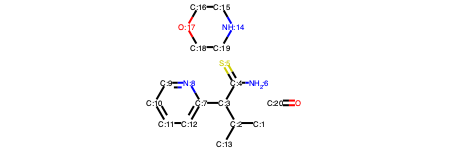

Reactants: [CH3:1][CH:2]([CH3:13])[CH:3]([C:7]1[CH:12]=[CH:11][CH:10]=[CH:9][N:8]=1)[C:4]([NH2:6])=[S:5].[NH:14]1[CH2:19][CH2:18][O:17][CH2:16][CH2:15]1.[CH2:20]=O


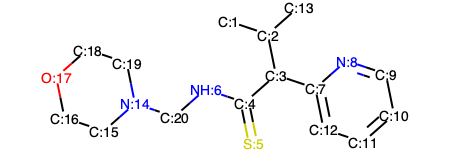

Products: [CH3:1][CH:2]([CH3:13])[CH:3]([C:7]1[CH:12]=[CH:11][CH:10]=[CH:9][N:8]=1)[C:4]([NH:6][CH2:20][N:14]1[CH2:19][CH2:18][O:17][CH2:16][CH2:15]1)=[S:5]


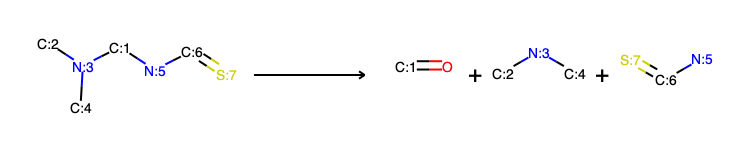

Extracted template: [C:2]-[N;H0;D3;+0:3](-[C:4])-[CH2;D2;+0:1]-[NH;D2;+0:5]-[C:6]=[S;D1;H0:7]>>O=[CH2;D1;+0:1].[C:2]-[NH;D2;+0:3]-[C:4].[NH2;D1;+0:5]-[C:6]=[S;D1;H0:7]


115


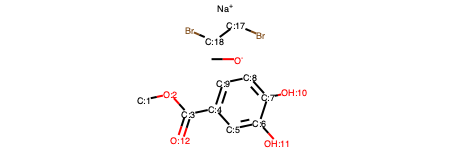

Reactants: [CH3:1][O:2][C:3](=[O:12])[C:4]1[CH:9]=[CH:8][C:7]([OH:10])=[C:6]([OH:11])[CH:5]=1.C[O-].[Na+].Br[CH2:17][CH2:18]Br


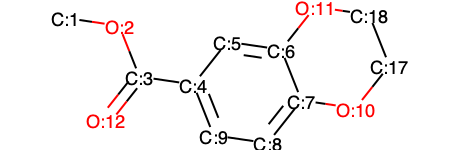

Products: [CH3:1][O:2][C:3](=[O:12])[C:4]1[CH:9]=[CH:8][C:7]2[O:10][CH2:17][CH2:18][O:11][C:6]=2[CH:5]=1


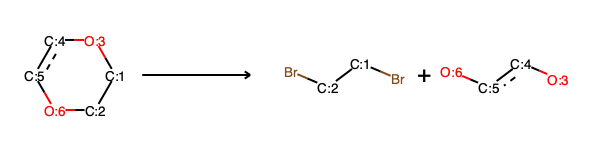

Extracted template: [CH2;D2;+0:1]1-[CH2;D2;+0:2]-[O;H0;D2;+0:6]-[c:5]:[c:4]-[O;H0;D2;+0:3]-1>>Br-[CH2;D2;+0:1]-[CH2;D2;+0:2]-Br.[OH;D1;+0:3]-[c:4]:[c:5]-[OH;D1;+0:6]


119


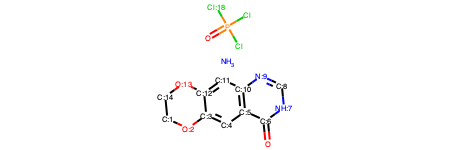

Reactants: [CH2:1]1[CH2:14][O:13][C:12]2[CH:11]=[C:10]3[C:5]([C:6](=O)[NH:7][CH:8]=[N:9]3)=[CH:4][C:3]=2[O:2]1.P(Cl)(Cl)([Cl:18])=O.N


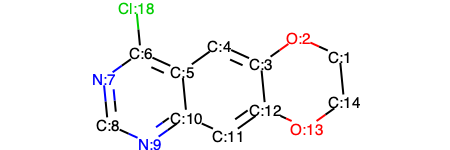

Products: [Cl:18][C:6]1[C:5]2[C:10](=[CH:11][C:12]3[O:13][CH2:14][CH2:1][O:2][C:3]=3[CH:4]=2)[N:9]=[CH:8][N:7]=1


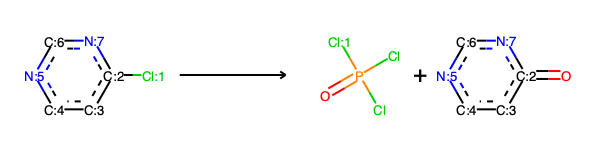

Extracted template: [Cl;H0;D1;+0:1]-[c;H0;D3;+0:2]1:[c:3]:[c:4]:[#7;a:5]:[c:6]:[n;H0;D2;+0:7]:1>>Cl-P(-Cl)(=O)-[Cl;H0;D1;+0:1].O=[c;H0;D3;+0:2]1:[c:3]:[c:4]:[#7;a:5]:[c:6]:[nH;D2;+0:7]:1


126


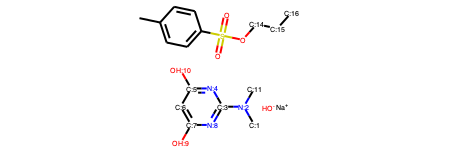

Reactants: [CH3:1][N:2]([CH3:11])[C:3]1[N:8]=[C:7]([OH:9])[CH:6]=[C:5]([OH:10])[N:4]=1.[OH-].[Na+].[CH2:14](OS(C1C=CC(C)=CC=1)(=O)=O)[CH2:15][CH3:16]


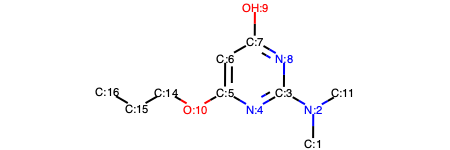

Products: [CH3:1][N:2]([CH3:11])[C:3]1[N:4]=[C:5]([O:10][CH2:14][CH2:15][CH3:16])[CH:6]=[C:7]([OH:9])[N:8]=1


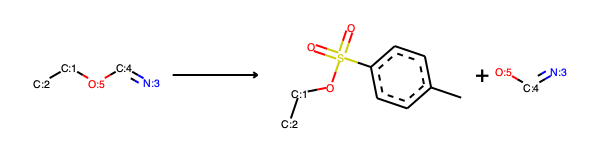

Extracted template: [#7;a:3]:[c:4]-[O;H0;D2;+0:5]-[CH2;D2;+0:1]-[C:2]>>C-c1:c:c:c(-S(=O)(=O)-O-[CH2;D2;+0:1]-[C:2]):c:c:1.[#7;a:3]:[c:4]-[OH;D1;+0:5]


129


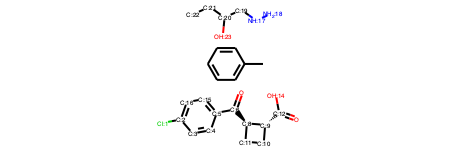

Reactants: [Cl:1][C:2]1[CH:16]=[CH:15][C:5]([C:6]([C@@H:8]2[CH2:11][CH2:10][C@H:9]2[C:12]([OH:14])=O)=O)=[CH:4][CH:3]=1.[NH:17]([CH2:19][CH:20]([OH:23])[CH2:21][CH3:22])[NH2:18].C1(C)C=CC=CC=1


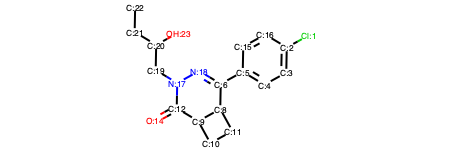

Products: [Cl:1][C:2]1[CH:3]=[CH:4][C:5]([C:6]2[CH:8]3[CH:9]([C:12](=[O:14])[N:17]([CH2:19][CH:20]([OH:23])[CH2:21][CH3:22])[N:18]=2)[CH2:10][CH2:11]3)=[CH:15][CH:16]=1


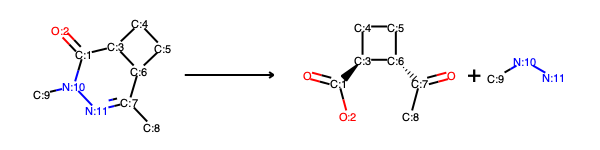

Extracted template: [C:9]-[N;H0;D3;+0:10]1-[N;H0;D2;+0:11]=[C;H0;D3;+0:7](-[c:8])-[CH;D3;+0:6]2-[C:5]-[C:4]-[CH;D3;+0:3]-2-[C;H0;D3;+0:1]-1=[O;H0;D1;+0:2]>>O=[C;H0;D3;+0:1](-[OH;D1;+0:2])-[CH;@;D3;+0:3]1-[C:4]-[C:5]-[CH;@@;D3;+0:6]-1-[C;H0;D3;+0:7](=O)-[c:8].[C:9]-[NH;D2;+0:10]-[NH2;D1;+0:11]


134


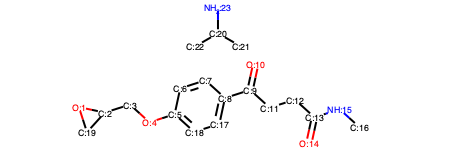

Reactants: [O:1]1[CH2:19][CH:2]1[CH2:3][O:4][C:5]1[CH:18]=[CH:17][C:8]([C:9]([CH2:11][CH2:12][C:13]([NH:15][CH3:16])=[O:14])=[O:10])=[CH:7][CH:6]=1.[CH:20]([NH2:23])([CH3:22])[CH3:21]


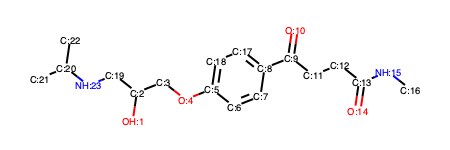

Products: [OH:1][CH:2]([CH2:19][NH:23][CH:20]([CH3:22])[CH3:21])[CH2:3][O:4][C:5]1[CH:18]=[CH:17][C:8]([C:9]([CH2:11][CH2:12][C:13]([NH:15][CH3:16])=[O:14])=[O:10])=[CH:7][CH:6]=1


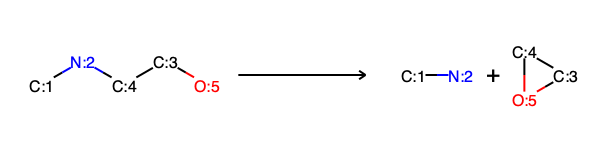

Extracted template: [C:1]-[NH;D2;+0:2]-[CH2;D2;+0:4]-[C:3]-[OH;D1;+0:5]>>[C:1]-[NH2;D1;+0:2].[C:3]1-[CH2;D2;+0:4]-[O;H0;D2;+0:5]-1


168


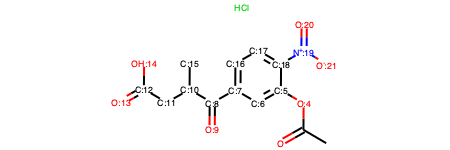

Reactants: C([O:4][C:5]1[CH:6]=[C:7]([CH:16]=[CH:17][C:18]=1[N+:19]([O-:21])=[O:20])[C:8]([CH:10]([CH3:15])[CH2:11][C:12]([OH:14])=[O:13])=[O:9])(=O)C.Cl


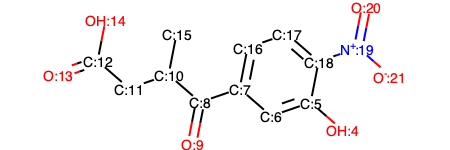

Products: [OH:4][C:5]1[CH:6]=[C:7]([CH:16]=[CH:17][C:18]=1[N+:19]([O-:21])=[O:20])[C:8]([CH:10]([CH3:15])[CH2:11][C:12]([OH:14])=[O:13])=[O:9]


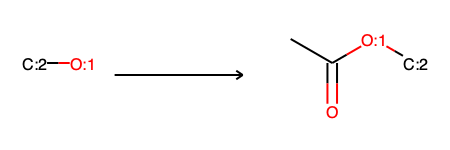

Extracted template: [OH;D1;+0:1]-[c:2]>>C-C(=O)-[O;H0;D2;+0:1]-[c:2]


195


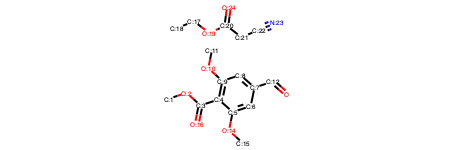

Reactants: [CH3:1][O:2][C:3](=[O:16])[C:4]1[C:9]([O:10][CH3:11])=[CH:8][C:7]([CH:12]=O)=[CH:6][C:5]=1[O:14][CH3:15].[CH2:17]([O:19][C:20](=[O:24])[CH2:21][C:22]#[N:23])[CH3:18]


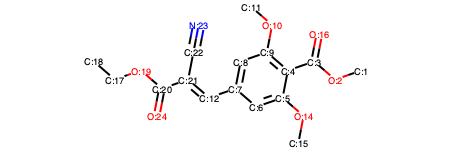

Products: [CH2:17]([O:19][C:20](=[O:24])[C:21]([C:22]#[N:23])=[CH:12][C:7]1[CH:8]=[C:9]([O:10][CH3:11])[C:4]([C:3]([O:2][CH3:1])=[O:16])=[C:5]([O:14][CH3:15])[CH:6]=1)[CH3:18]


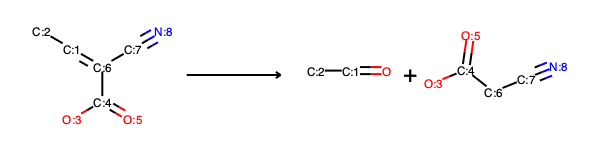

Extracted template: [#8:3]-[C:4](=[O;D1;H0:5])-[C;H0;D3;+0:6](-[C:7]#[N;D1;H0:8])=[CH;D2;+0:1]-[c:2]>>O=[CH;D2;+0:1]-[c:2].[#8:3]-[C:4](=[O;D1;H0:5])-[CH2;D2;+0:6]-[C:7]#[N;D1;H0:8]


242


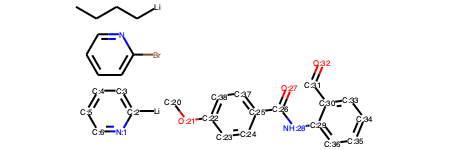

Reactants: [N:1]1[CH:6]=[CH:5][CH:4]=[CH:3][C:2]=1[Li].BrC1C=CC=CN=1.C([Li])CCC.[CH3:20][O:21][C:22]1[CH:38]=[CH:37][C:25]([C:26]([NH:28][C:29]2[CH:36]=[CH:35][CH:34]=[CH:33][C:30]=2[CH:31]=[O:32])=[O:27])=[CH:24][CH:23]=1


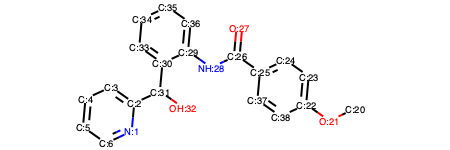

Products: [CH3:20][O:21][C:22]1[CH:23]=[CH:24][C:25]([C:26]([NH:28][C:29]2[CH:36]=[CH:35][CH:34]=[CH:33][C:30]=2[CH:31]([OH:32])[C:2]2[CH:3]=[CH:4][CH:5]=[CH:6][N:1]=2)=[O:27])=[CH:37][CH:38]=1


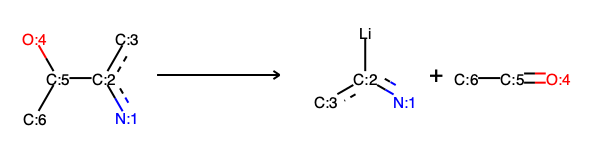

Extracted template: [#7;a:1]:[c;H0;D3;+0:2](:[c:3])-[CH;D3;+0:5](-[OH;D1;+0:4])-[c:6]>>[#7;a:1]:[c;H0;D3;+0:2](-[Li]):[c:3].[O;H0;D1;+0:4]=[CH;D2;+0:5]-[c:6]


250


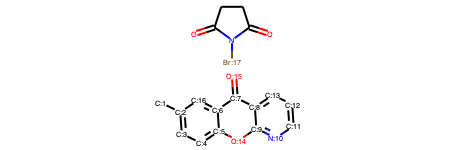

Reactants: [CH3:1][C:2]1[CH:3]=[CH:4][C:5]2[O:14][C:9]3=[N:10][CH:11]=[CH:12][CH:13]=[C:8]3[C:7](=[O:15])[C:6]=2[CH:16]=1.[Br:17]N1C(=O)CCC1=O


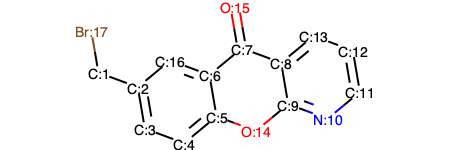

Products: [Br:17][CH2:1][C:2]1[CH:3]=[CH:4][C:5]2[O:14][C:9]3=[N:10][CH:11]=[CH:12][CH:13]=[C:8]3[C:7](=[O:15])[C:6]=2[CH:16]=1


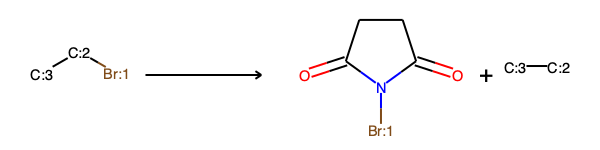

Extracted template: [Br;H0;D1;+0:1]-[CH2;D2;+0:2]-[c:3]>>O=C1-C-C-C(=O)-N-1-[Br;H0;D1;+0:1].[CH3;D1;+0:2]-[c:3]




In [48]:
good_ks = [25, 35, 49, 51, 67, 115, 119, 126, 129, 134, 168, 195, 242, 250]
for k in good_ks:
    show_k(k)
    


### Good chiral 

1102


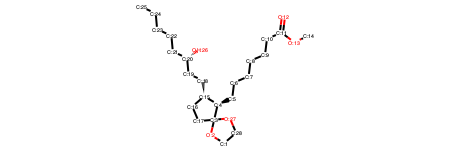

Reactants: [CH2:1]1[CH2:28][O:27][C:3]2([CH2:17][CH2:16][C@H:15]([CH2:18][CH2:19][C@@H:20]([OH:26])[CH2:21][CH2:22][CH2:23][CH2:24][CH3:25])[C@H:4]2[CH2:5][CH2:6][CH2:7][CH2:8][CH2:9][CH2:10][C:11]([O:13][CH3:14])=[O:12])[O:2]1


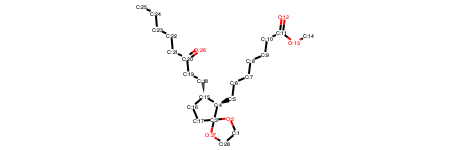

Products: [CH2:28]1[CH2:1][O:2][C:3]2([CH2:17][CH2:16][C@H:15]([CH2:18][CH2:19][C:20](=[O:26])[CH2:21][CH2:22][CH2:23][CH2:24][CH3:25])[C@H:4]2[CH2:5][CH2:6][CH2:7][CH2:8][CH2:9][CH2:10][C:11]([O:13][CH3:14])=[O:12])[O:27]1


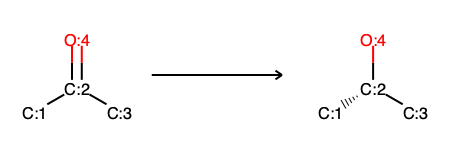

Extracted template: [C:1]-[C;H0;D3;+0:2](-[C:3])=[O;H0;D1;+0:4]>>[C:1]-[CH;@@;D3;+0:2](-[C:3])-[OH;D1;+0:4]


1115


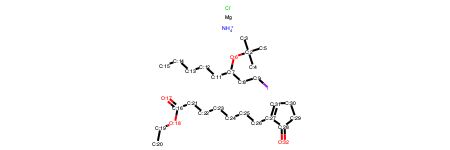

Reactants: [Mg].[C:2]([O:6][CH:7]([CH2:11][CH2:12][CH2:13][CH2:14][CH3:15])[CH2:8][CH2:9]I)([CH3:5])([CH3:4])[CH3:3].[C:16]([CH2:21][CH2:22][CH2:23][CH2:24][CH2:25][CH2:26][C:27]1[C:28](=[O:32])[CH2:29][CH2:30][CH:31]=1)([O:18][CH2:19][CH3:20])=[O:17].[Cl-].[NH4+]


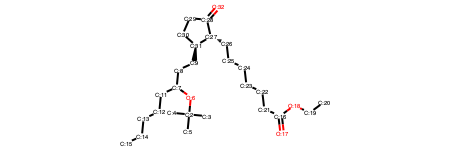

Products: [C:2]([O:6][CH:7]([CH2:11][CH2:12][CH2:13][CH2:14][CH3:15])[CH2:8][CH2:9][C@@H:31]1[C@@H:27]([CH2:26][CH2:25][CH2:24][CH2:23][CH2:22][CH2:21][C:16]([O:18][CH2:19][CH3:20])=[O:17])[C:28](=[O:32])[CH2:29][CH2:30]1)([CH3:5])([CH3:4])[CH3:3]


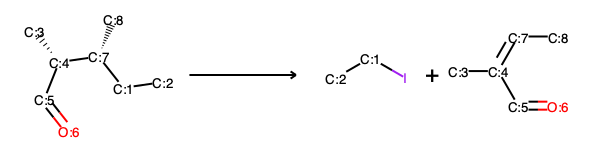

Extracted template: [C:3]-[CH;@@;D3;+0:4](-[C:5]=[O;D1;H0:6])-[CH;@;D3;+0:7](-[C:8])-[CH2;D2;+0:1]-[C:2]>>I-[CH2;D2;+0:1]-[C:2].[C:3]-[C;H0;D3;+0:4](-[C:5]=[O;D1;H0:6])=[CH;D2;+0:7]-[C:8]


1972


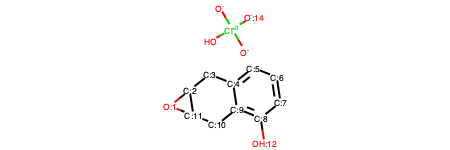

Reactants: [O:1]1[CH:11]2[CH:2]1[CH2:3][C:4]1[CH:5]=[CH:6][CH:7]=[C:8]([OH:12])[C:9]=1[CH2:10]2.Cl(O)(=O)(=O)=[O:14]


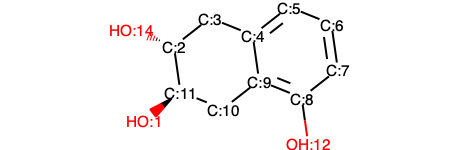

Products: [C:8]1([OH:12])[C:9]2[CH2:10][C@@H:11]([OH:1])[C@H:2]([OH:14])[CH2:3][C:4]=2[CH:5]=[CH:6][CH:7]=1


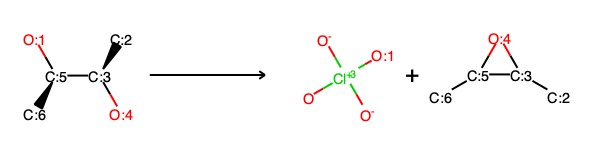

Extracted template: [C:2]-[CH;@@;D3;+0:3](-[OH;D1;+0:4])-[CH;@@;D3;+0:5](-[C:6])-[OH;D1;+0:1]>>O-[Cl+3](-[O-;H0;D1:1])(-[O-])-[O-].[C:2]-[CH;D3;+0:3]1-[O;H0;D2;+0:4]-[CH;D3;+0:5]-1-[C:6]


3290


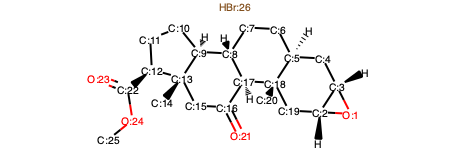

Reactants: [O:1]1[C@H:3]2[CH2:4][C@H:5]3[C@:18]([CH3:20])([CH2:19][C@@H:2]12)[C@@H:17]1[C@H:8]([C@H:9]2[C@@:13]([CH2:15][C:16]1=[O:21])([CH3:14])[C@@H:12]([C:22]([O:24][CH3:25])=[O:23])[CH2:11][CH2:10]2)[CH2:7][CH2:6]3.[BrH:26]


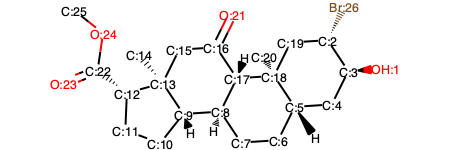

Products: [Br:26][C@H:2]1[CH2:19][C@@:18]2([CH3:20])[C@@H:5]([CH2:6][CH2:7][C@@H:8]3[C@@H:17]2[C:16](=[O:21])[CH2:15][C@@:13]2([CH3:14])[C@H:9]3[CH2:10][CH2:11][C@@H:12]2[C:22]([O:24][CH3:25])=[O:23])[CH2:4][C@@H:3]1[OH:1]


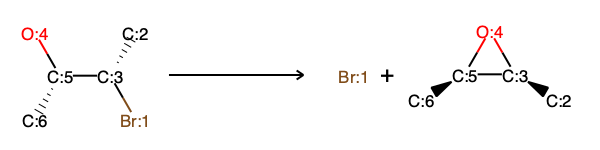

Extracted template: [Br;H0;D1;+0:1]-[CH;@@;D3;+0:3](-[C:2])-[CH;@;D3;+0:5](-[C:6])-[OH;D1;+0:4]>>[BrH;D0;+0:1].[C:2]-[CH;@@;D3;+0:3]1-[O;H0;D2;+0:4]-[CH;@@;D3;+0:5]-1-[C:6]


8144


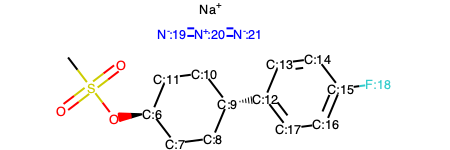

Reactants: CS(O[C@H:6]1[CH2:11][CH2:10][C@H:9]([C:12]2[CH:17]=[CH:16][C:15]([F:18])=[CH:14][CH:13]=2)[CH2:8][CH2:7]1)(=O)=O.[N-:19]=[N+:20]=[N-:21].[Na+]


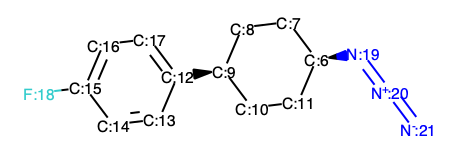

Products: [F:18][C:15]1[CH:16]=[CH:17][C:12]([C@@H:9]2[CH2:10][CH2:11][C@H:6]([N:19]=[N+:20]=[N-:21])[CH2:7][CH2:8]2)=[CH:13][CH:14]=1


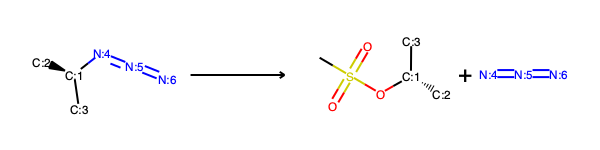

Extracted template: [C:2]-[CH;@;D3;+0:1](-[C:3])-[N;H0;D2;+0:4]=[#7;+:5]=[N;-;D1;H0:6]>>C-S(=O)(=O)-O-[CH;@@;D3;+0:1](-[C:2])-[C:3].[N-;H0;D1:4]=[#7;+:5]=[N;-;D1;H0:6]




In [49]:
good_chiral_ks = [1102, 1115, 1972, 3290, 8144]
for k in good_chiral_ks:
    show_k(k)

### Bad

69


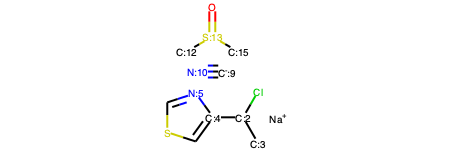

Reactants: Cl[CH:2]([C:4]1[N:5]=CSC=1)[CH3:3].[C-:9]#[N:10].[Na+].[CH3:12][S:13]([CH3:15])=O


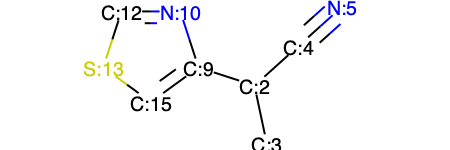

Products: [S:13]1[CH:15]=[C:9]([CH:2]([CH3:3])[C:4]#[N:5])[N:10]=[CH:12]1


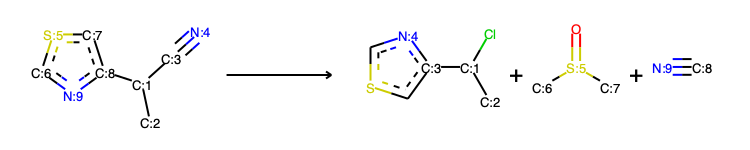

Extracted template: [C;D1;H3:2]-[CH;D3;+0:1](-[C;H0;D2;+0:3]#[N;H0;D1;+0:4])-[c;H0;D3;+0:8]1:[cH;D2;+0:7]:[s;H0;D2;+0:5]:[cH;D2;+0:6]:[n;H0;D2;+0:9]:1>>Cl-[CH;D3;+0:1](-[C;D1;H3:2])-[c;H0;D3;+0:3]1:[n;H0;D2;+0:4]:c:s:c:1.O=[S;H0;D3;+0:5](-[CH3;D1;+0:6])-[CH3;D1;+0:7].[C-;H0;D1:8]#[N;H0;D1;+0:9]


97


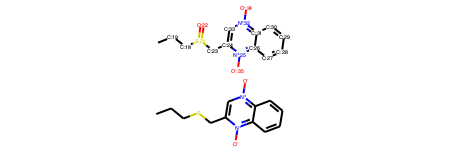

Reactants: C(SCC1C=[N+]([O-])C2C(=CC=CC=2)[N+]=1[O-])CC.[CH2:18]([S:21]([CH2:23][C:24]1[CH:33]=[N+:32]([O-:34])[C:31]2[C:26](=[CH:27][CH:28]=[CH:29][CH:30]=2)[N+:25]=1[O-:35])=[O:22])[CH2:19]C


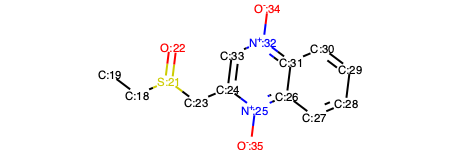

Products: [CH2:18]([S:21]([CH2:23][C:24]1[CH:33]=[N+:32]([O-:34])[C:31]2[C:26](=[CH:27][CH:28]=[CH:29][CH:30]=2)[N+:25]=1[O-:35])=[O:22])[CH3:19]


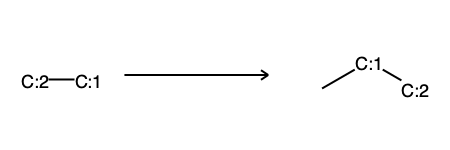

Extracted template: [C:2]-[CH3;D1;+0:1]>>C-[CH2;D2;+0:1]-[C:2]




In [50]:
bad_ks = [69, 97]
for k in bad_ks:
    show_k(k)